In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Better visuals
sns.set(style="whitegrid")


In [7]:
# Load historical trading data
hist = pd.read_csv('C:/Users/Khushi/trader-performance-vs-marketsentiment/data/historical_data.csv')

# Load sentiment data
sentiment = pd.read_csv('C:/Users/Khushi/trader-performance-vs-marketsentiment/data/fear_greed_index.csv')

# Preview both datasets
print("Historical Trader Data:")
display(hist.head())

print("\nSentiment Data:")
display(sentiment.head())


Historical Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12



Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [8]:
# Convert trading timestamp to just date
hist['Date'] = pd.to_datetime(hist['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# Convert sentiment date to datetime
sentiment['Date'] = pd.to_datetime(sentiment['date']).dt.date

# Merge sentiment into trade data using Date
df = pd.merge(hist, sentiment[['Date', 'value', 'classification']], on='Date', how='left')

# Drop rows where sentiment is missing
df = df.dropna(subset=['classification'])

print("✅ Merged Sample:")
display(df[['account', 'symbol', 'Date', 'Closed PnL', 'classification']].head())


✅ Merged Sample:


KeyError: "['account', 'symbol'] not in index"

In [9]:
print("📋 Columns in merged DataFrame:")
print(df.columns.tolist())



📋 Columns in merged DataFrame:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date', 'value', 'classification']


In [10]:
display(df[['account', 'symbol', 'Date', 'Closed PnL', 'classification']].head())


KeyError: "['account', 'symbol'] not in index"

In [11]:
# Convert Timestamp to Date
hist['Date'] = pd.to_datetime(hist['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date
sentiment['Date'] = pd.to_datetime(sentiment['date']).dt.date

# Merge
df = pd.merge(hist, sentiment[['Date', 'value', 'classification']], on='Date', how='left')
df = df.dropna(subset=['classification'])

# 🔍 Check what columns exist
print("📋 Columns in merged data:")
print(df.columns.tolist())

# ✅ Display only columns that actually exist
display(df[['Date', 'Closed PnL', 'classification']].head())



📋 Columns in merged data:
['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp', 'Date', 'value', 'classification']


,Date,Closed PnL,classification
0,2024-12-02,0.0,Extreme Greed
1,2024-12-02,0.0,Extreme Greed
2,2024-12-02,0.0,Extreme Greed
3,2024-12-02,0.0,Extreme Greed
4,2024-12-02,0.0,Extreme Greed


In [12]:
# Aggregate PnL by sentiment class
pnl_summary = df.groupby('classification')['Closed PnL'].agg(['mean', 'median', 'count', 'sum']).sort_values(by='mean', ascending=False)

# Save summary to CSV
pnl_summary.to_csv('C:/Users/Khushi/trader-performance-vs-marketsentiment/output/summary.csv')

print("📊 Summary Table:")
display(pnl_summary)


📊 Summary Table:


,mean,median,count,sum
classification,,,,
Extreme Greed,67.892861,0.0,39992,2.715171e+06
Fear,54.290400,0.0,61837,3.357155e+06
Greed,42.743559,0.0,50303,2.150129e+06
Extreme Fear,34.537862,0.0,21400,7.391102e+05
Neutral,34.307718,0.0,37686,1.292921e+06


In [13]:
# Add Win/Loss label
df['PnL Result'] = df['Closed PnL'].apply(lambda x: 'Win' if x > 0 else 'Loss')

# Count Win/Loss for each sentiment
wl = df.groupby(['classification', 'PnL Result']).size().unstack().fillna(0)

# Compute Win/Loss ratio
wl['Win/Loss Ratio'] = wl['Win'] / wl['Loss'].replace(0, 1)

print("⚔️ Win/Loss Stats:")
display(wl)


⚔️ Win/Loss Stats:


PnL Result,Loss,Win,Win/Loss Ratio
classification,,,
Extreme Fear,13469,7931,0.588834
Extreme Greed,21398,18594,0.868960
Fear,35818,26019,0.726422
Greed,30945,19358,0.625561
Neutral,22725,14961,0.658350


C:\Users\Khushi\AppData\Local\Temp\ipykernel_30452\34657506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_summary.reset_index(), x='classification', y='mean', palette='coolwarm')


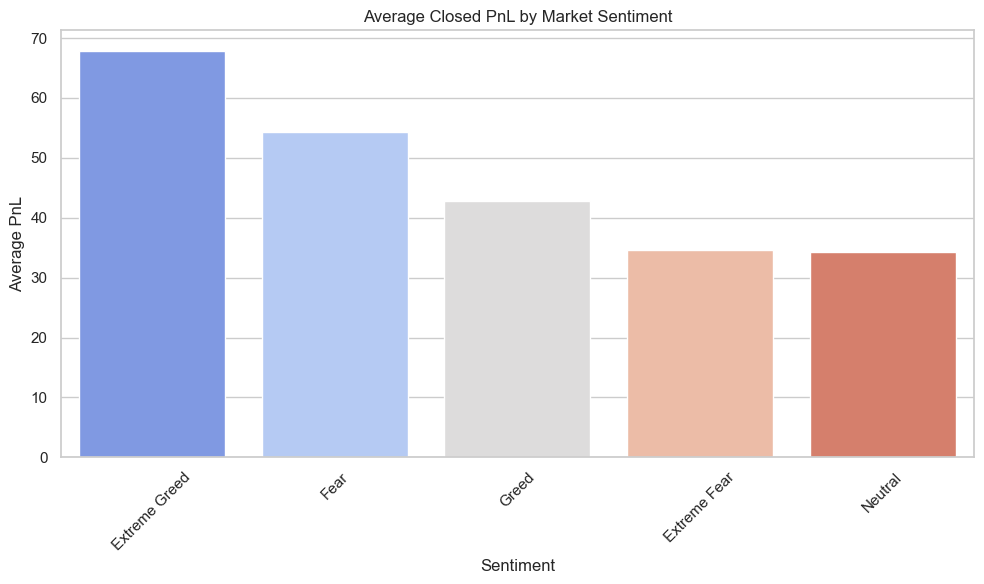

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data=pnl_summary.reset_index(), x='classification', y='mean', palette='coolwarm')
plt.title('Average Closed PnL by Market Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Average PnL')
plt.xticks(rotation=45)
plt.tight_layout()

# Save to charts folder
plt.savefig('C:/Users/Khushi/trader-performance-vs-marketsentiment/output/charts/avg_pnl_by_sentiment.png')
plt.show()


In [15]:
df.to_csv('C:/Users/Khushi/trader-performance-vs-marketsentiment/output/merged_data_with_sentiment.csv', index=False)
print("✅ Final merged data saved.")


✅ Final merged data saved.
